<a href="https://colab.research.google.com/github/ankur2392roy/Online-fraud/blob/main/Online_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns


In [34]:
df=pd.read_csv('onlinefraud.csv',index_col=False)
df.head(10)
df.shape[0]


6362620

In [36]:
#Filter out transaction types by fraud or not fraud
df_fraud=df[df['isFraud']==1.0]
df_notfraud=df[df['isFraud']==0.0]
print(df[df['isFraud']==1.0].shape[0])


8213


In [37]:
trans_type=df['type'].unique()
print(trans_type)
df.loc[(df['type']=='TRANSFER') & (df['isFraud']==1.0), 'Fraud']=1.0
df.loc[(df['type']=='TRANSFER' )& (df['isFraud']==0.0), 'Fraud']=0.0
df.groupby('Fraud').count()

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Fraud,,,,,,,,,,,
0.0,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812
1.0,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097


TypeError: ignored

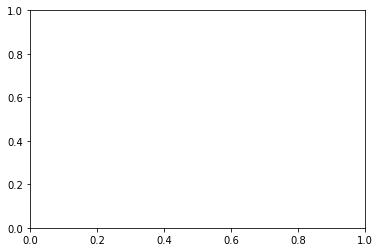

In [83]:
import matplotlib.pyplot as plt
df_transfer=df[df['type']=='TRANSFER']
df_payment=df[df['type']=='PAYMENT']
df_debit=df[df['type']=='DEBIT']
df_cashout=df[df['type']=='CASH_OUT']
df_cashin=df[df['type']=='CASH_IN']


a=df_transfer.groupby('isFraud')['type'].count()
b=df_payment.groupby('isFraud')['type'].count()
c=df_debit.groupby('isFraud')['type'].count()
d=df_cashout.groupby('isFraud')['type'].count()
e=df_cashin.groupby('isFraud')['type'].count()


# df_list=np.array([b,a])
# nrows=2
# ncols=1

fig, axes = plt.subplots()


# count=0
# for r in range(nrows):
#     for c in range(ncols):
#         x=df_list[count]
#         x.plot(ax=axes[r,c],kind='pie',subplots=True,figsize=(8, 3),label='TRANSFER',autopct='%.2f',labels=['Not Fraud','Fraud'])
#         #axes[r,c].pie(x['type'])
#         count+=1


a.plot.pie(ax=axes[0,0],label='TRANSFER',figsize=(8, 3),autopct='%.2f',labels=['Not Fraud','Fraud'])
##b['type'].plot.pie(ax=axes[0,1],label='TRANSFER',figsize=(8, 3),autopct='%.2f',labels=['Not Fraud','Fraud'])
